In [1]:
import sys
from pathlib import Path
# Get the repository root (2 levels up from current notebook)
repo_root = Path(__file__).parent.parent.parent if '__file__' in globals() else Path.cwd().parent.parent
sys.path.insert(0, str(repo_root))

# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import Template
# Definición de modulos

import torch
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from imblearn.over_sampling  import SMOTE, ADASYN
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, recall_score, f1_score, precision_score
from sklearn.decomposition import PCA


Template = Template.Template()

# Build the path to the Excel file in the repository root
data_path = os.path.join(os.path.dirname(os.getcwd()), '..', 'Datos1_InteraccionesNIR.xlsx')

In [2]:
# Build the path to the Excel file in the repository root
data_path = os.path.join(repo_root, 'Datos1_InteraccionesNIR.xlsx')
# import the data from all sheets of the Excel file

df13 = pd.read_excel(data_path, sheet_name=13)


## Classification of Healthy plants vs Unhealthy plants

## SMOTE

In [3]:
# Make a new column 'Health_Status'
df = df13.copy()

# Drop the 'Planta' column
df = df.drop(columns=['Planta'])

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.071775,0.069190,0.069348,0.068999,0.067885,0.065449,0.061154,0.058129,...,0.034755,0.034553,0.034263,0.034055,0.033855,0.033714,0.033636,0.033576,0.033577,0.033461
1,Control,1,0.075353,0.074423,0.079386,0.071253,0.065744,0.065102,0.061031,0.060661,...,0.036825,0.036618,0.036405,0.036211,0.036003,0.035880,0.035841,0.035705,0.035572,0.035464
2,Control,1,0.083462,0.077633,0.079281,0.075569,0.071800,0.069781,0.068002,0.066085,...,0.033597,0.033424,0.033123,0.033009,0.032985,0.032846,0.032780,0.032647,0.032371,0.032174
3,Control,1,0.077487,0.073297,0.078130,0.075677,0.071632,0.068066,0.063898,0.064285,...,0.037609,0.037356,0.037168,0.036953,0.036759,0.036600,0.036416,0.036327,0.036376,0.036278
4,Control,1,0.069739,0.068477,0.076243,0.071491,0.066093,0.064169,0.062649,0.060493,...,0.031388,0.031220,0.031033,0.030897,0.030829,0.030720,0.030596,0.030543,0.030524,0.030453


In [4]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    181
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    181
0    181
Name: count, dtype: int64

Original shape: (211, 2151), Balanced shape: (362, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_29328\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.071775,0.069190,0.069348,0.068999,0.067885,0.065449,0.061154,0.058129,0.058077,...,0.034755,0.034553,0.034263,0.034055,0.033855,0.033714,0.033636,0.033576,0.033577,0.033461
1,1,0.075353,0.074423,0.079386,0.071253,0.065744,0.065102,0.061031,0.060661,0.061293,...,0.036825,0.036618,0.036405,0.036211,0.036003,0.035880,0.035841,0.035705,0.035572,0.035464
2,1,0.083462,0.077633,0.079281,0.075569,0.071800,0.069781,0.068002,0.066085,0.066366,...,0.033597,0.033424,0.033123,0.033009,0.032985,0.032846,0.032780,0.032647,0.032371,0.032174
3,1,0.077487,0.073297,0.078130,0.075677,0.071632,0.068066,0.063898,0.064285,0.066431,...,0.037609,0.037356,0.037168,0.036953,0.036759,0.036600,0.036416,0.036327,0.036376,0.036278
4,1,0.069739,0.068477,0.076243,0.071491,0.066093,0.064169,0.062649,0.060493,0.059644,...,0.031388,0.031220,0.031033,0.030897,0.030829,0.030720,0.030596,0.030543,0.030524,0.030453


In [5]:
# data treatment

# Data preparation for model production
df_X = df_balanced.drop(columns=['Sana'])

X = df_X.values  

y = df_balanced['Sana'].values

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Logistic Regression

In [6]:
# Define a more comprehensive parameter grid for hyperparameter tuning
param_grid = [
    # L1 regularization options
    {
        'PCA__n_components': [2],
        'model__penalty': ['l1'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga'],
        'model__class_weight': [None, 'balanced']
    },
    # L2 regularization options
    {
        'PCA__n_components': [2],
        'model__penalty': ['l2'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga', 'lbfgs'],
        'model__class_weight': [None, 'balanced']
    },
    # Elasticnet option (saga only)
    {
        'PCA__n_components': [2],
        'model__penalty': ['elasticnet'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['saga'],
        'model__l1_ratio': [0.2, 0.5, 0.8],
        'model__class_weight': [None, 'balanced']
    }
]

# Create a pipeline
pipeline = Pipeline([
    ('PCA', PCA()),
    ('model', LogisticRegression(max_iter=1000))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
# Make predictions with the best model
y_pred_best = best_model.predict(X_test)
# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.8623853211009175
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.76      0.85        55
           1       0.80      0.96      0.87        54

    accuracy                           0.86       109
   macro avg       0.88      0.86      0.86       109
weighted avg       0.88      0.86      0.86       109



In [7]:
# Parameter for the best model found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'PCA__n_components': 2, 'model__C': 0.01, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'saga'}


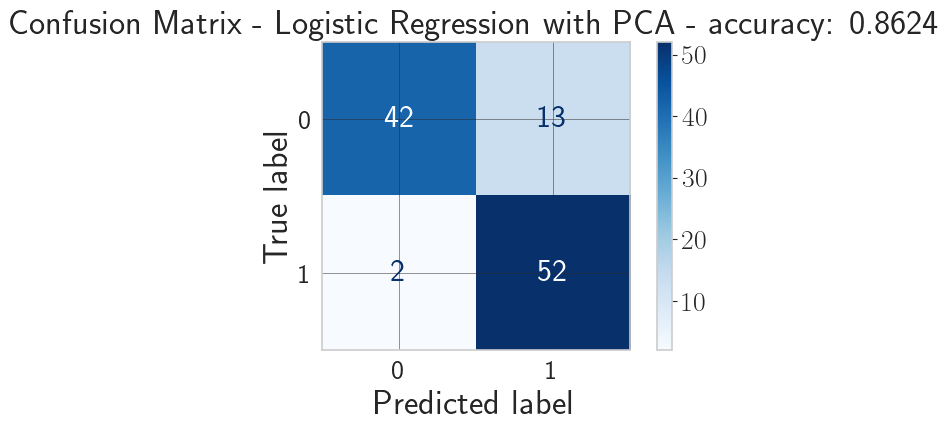

In [8]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
# Display the confusion matrix
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - Logistic Regression with PCA - accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
plt.tight_layout()
plt.show()